__Alejandro Gonzalez Garcia__
<br>
Date: Feb. 11, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 14: MCMCs for continuous variables</font></center>

## <font color=#46769B>Introduction</font>

Our goals for this notebook are:
- Gain familiarity with MCMC methods.
- Implement the Metropolis MCMC algorithm for some familiar PDFs

Required reading:
- *Lesson 7: MCMCs for continuous variables*


## <font color=#46769B>Part (a)</font>

In Exercise 7, we introduced the following PDF describing the photon energy emitted from a blackbody:
$$P(E) = \left\{ \begin{array}{cc} \frac{A E^2}{(k_B T)^3} \left(e^{\frac{E}{k_B T}} -1 \right)^{-1} & {\rm for} \; E \ge 0 \\
0 & {\rm otherwise} \end{array} \right. \, ,$$
where $k_B$ is Boltzmann's constant and $A = 0.415954$ is a numerical constant. You may take $k_B T = 1$ in your analysis.

- Write a code implementing the Metropolis MCMC algorithm, generate $N = 10^5$ samples for $E$ from $P(E)$.
    - Use a normal distribution for the transition PDF $Q(E|E^\prime)$.
    - You are free to choose the starting element of your chain, $E_0$, and the width of your transition PDF, $\sigma_q$.

- Plot the first 1000 entries in your chain, $E_i$ vs $i$. Choose a value of $E_0$ such that there is no burn-in period in your chain.

- Calculate the __acceptance fraction__ of your chain. The acceptance fraction is
$$f_{\rm accept} = \frac{N_{\rm accept}}{N}$$
where $N_{\rm accept}$ is the number of times your algorithm accepts the new sample during the acceptance/rejection step.
Tune the value of $\sigma_q$ so that the acceptance fraction of your chain is in the range $30-50\%$.

- Plot a histogram of your samples and compare to the PDF $P(E)$.

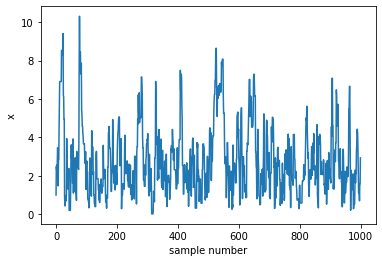

E0 = 1 gives no burn-in period.
the acceptance fraction is: 0.4214094837389129


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


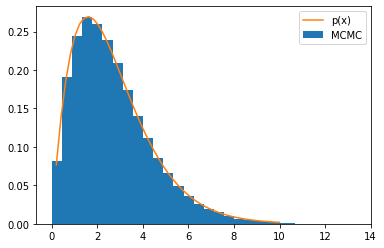

In [2]:
from numpy.lib.shape_base import expand_dims
import numpy as np
import matplotlib.pyplot as plt

num = 10**5

A = 0.415954

# KbT = 1 so we are able to simplify p(E)

# note that the program gives an error code for when E = 0

def p(E):
    return np.where(E >= 0, A*E**2 / (np.exp(E) - 1), 0)


def mcmc_simulations(E0, sigma_q):
    E_samples = [E0]

    for i in range(num-1):
        E_old = E_samples[i]
        E_new = np.random.normal(E_old,sigma_q)
        A = p(E_new) / p(E_old)
        if A > 1:
            E_samples.append(E_new)
        else:
            r = np.random.rand()
            if A > r:
                E_samples.append(E_new)
            else:
                E_samples.append(E_old)
    return E_samples


E_samples = mcmc_simulations(1,1.5)
plt.plot(E_samples[:1000])
plt.ylabel('x')
plt.xlabel('sample number')
plt.show()
print('E0 = 1 gives no burn-in period.')

N_accept = []
N = []

for i in range(len(E_samples)-1):
    if E_samples[i] == E_samples[i + 1]:
        N_accept.append(E_samples[i])
    else:
        N.append(E_samples[i])

f_accept = len(N_accept) / len(N)

print('the acceptance fraction is:', f_accept)

plt.hist(E_samples,density=True,bins=30,label='MCMC')

x = np.linspace(0,10)
plt.plot(x,p(x),label='p(x)')

plt.legend()
plt.show()

## <font color=#46769B>Part (b)</font>

In Exercise 8, we introduced the following PDF describing the electron energy emitted in neutron decay:
$$P(E) = \left\{ \begin{array}{cl} A E \sqrt{E^2 - E_m^2} (E_{\rm max} - E)^2 & {\rm for} \; E_m \le E \le E_{\rm max} \\
0 & {\rm otherwise} \end{array} \right. \, ,$$
where the minimum electron energy is given by its rest mass energy $E_m = 0.511$ MeV and the maximum available energy is $E_{\rm max} = 1.292$ MeV. $A = 17.661$ is a normalizing constant.

Follow the same steps as in part (a) for this PDF.


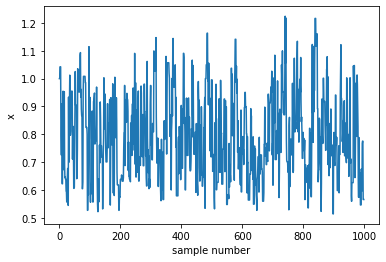

the acceptance fraction is: 0.47665386887182515


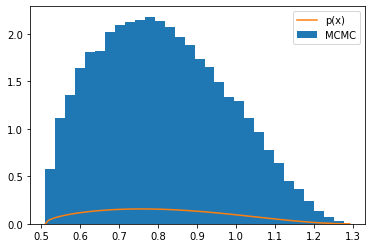

In [3]:
A = 1.292
E_m = 0.511
E_max = 1.292

def p(E):
  if E <= E_m or E_max <= E:
    return 0
  else:
    return A*E*np.sqrt(E**2 - E_m**2) * (E_max - E)**2


def mcmc_simulations(E0,sigma_q):
    E_samples = [E0]

    for i in range(num - 1):
        E_old = E_samples[i]
        E_new = np.random.normal(E_old, sigma_q)
        A = p(E_new) / p(E_old)
        if A > 1:
            E_samples.append(E_new)
        else:
            r = np.random.rand()
            if A > r:
                E_samples.append(E_new)
            else:
                E_samples.append(E_old)
    return E_samples


E_samples = mcmc_simulations(1,0.2)

plt.plot(E_samples[:1000])
plt.ylabel('x')
plt.xlabel('sample number')
plt.show()

N_accept = []
N = []

for i in range(len(E_samples)-1):
    if E_samples[i] == E_samples[i + 1]:
        N_accept.append(E_samples[i])
    else:
        N.append(E_samples[i])

f_accept = len(N_accept) / len(N)

print('the acceptance fraction is:', f_accept)

plt.hist(E_samples,density=True,bins=30,label='MCMC')

x = np.linspace(E_m,E_max,100)
y = map(p,x)
y = list(y)
plt.plot(x,y,label='p(x)')
plt.legend()
plt.show()